In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("student_depression_dataset.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
df.info() # Информация о наборе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe() # Статистический разбор

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.columns # Вывод колонок в наборе данных

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
print(df.dtypes) # Список столбцов и их типов данных

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [ ]:
for column in df.columns: #проходимся по всем столбцам и считаем чсло уникальных значений
    print(f'{column}: {df[column].nunique()} уникальных значений') # Количество уникальных значений

id: 27901 уникальных значений
Gender: 2 уникальных значений
Age: 34 уникальных значений
City: 52 уникальных значений
Profession: 14 уникальных значений
Academic Pressure: 6 уникальных значений
Work Pressure: 3 уникальных значений
CGPA: 332 уникальных значений
Study Satisfaction: 6 уникальных значений
Job Satisfaction: 5 уникальных значений
Sleep Duration: 5 уникальных значений
Dietary Habits: 4 уникальных значений
Degree: 28 уникальных значений
Have you ever had suicidal thoughts ?: 2 уникальных значений
Work/Study Hours: 13 уникальных значений
Financial Stress: 6 уникальных значений
Family History of Mental Illness: 2 уникальных значений
Depression: 2 уникальных значений


In [ ]:
# Посмотрим типы данных и ид
for i, column in enumerate(df.columns):
    print(f"{column} — {df[column].dtype}  {i}")

id — int64  0
Gender — object  1
Age — float64  2
City — object  3
Profession — object  4
Academic Pressure — float64  5
Work Pressure — float64  6
CGPA — float64  7
Study Satisfaction — float64  8
Job Satisfaction — float64  9
Sleep Duration — object  10
Dietary Habits — object  11
Degree — object  12
Have you ever had suicidal thoughts ? — object  13
Work/Study Hours — float64  14
Financial Stress — object  15
Family History of Mental Illness — object  16
Depression — int64  17


**Задача №1**


Определить типы переменных


Номинальные: 0, 1, 3, 4, 12, 13, 16, 17. (У всех этих данных нет порядка и нет смысла выполнять математические операции.)

Порядковые: 10, 11.  (У таких данных есть логический порядок, но числовой смысл не строгий.)


числовые:15, 5, 6, 8, 9.  (шкалы, счёт), 2, 7, 14. (измеряются точно и не ограничены)

In [ ]:
cat_cols = [ #собираем список категориальных колонок и приводим к типу category и смотрим инфу
    'Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness', 'Depression'
]

df[cat_cols] = df[cat_cols].astype('category')
df[cat_cols].describe()

#count - count — количество наблюдений
#unique — число уникальных категорий
#top — самая частая категория
#freq — сколько раз она встречается

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,No,1
freq,15547,1570,27870,8310,10317,6080,17656,14398,16336


In [ ]:
num_cols = [. # формируем список числовых переменных
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress'
]

df[num_cols].describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000


**Гистограмма для числовых переменных:**

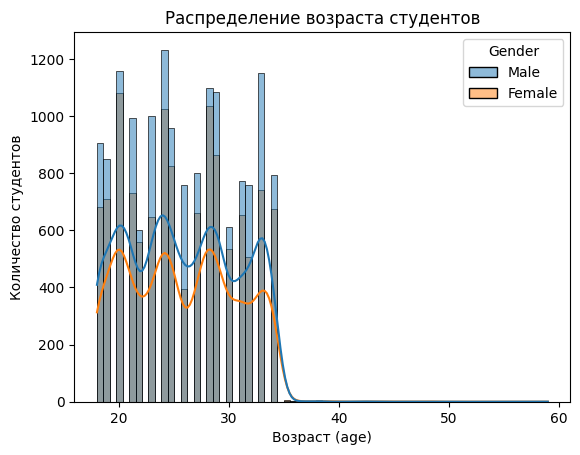

In [ ]:
sns.histplot(data=df, x='Age', hue='Gender', kde=True)
plt.title('Распределение возраста студентов')
plt.xlabel('Возраст (age)')
plt.ylabel('Количество студентов')
plt.show()

**Задание №2**

Описать вывод графиков.

-Является ли распределение нормальным или отлично от него?


-Концентрация большинства значений


-если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

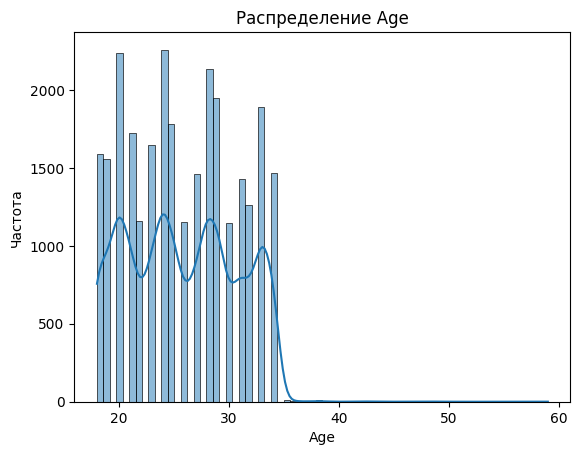

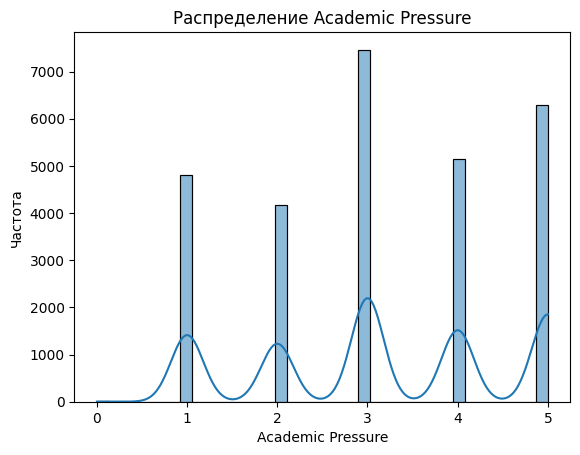

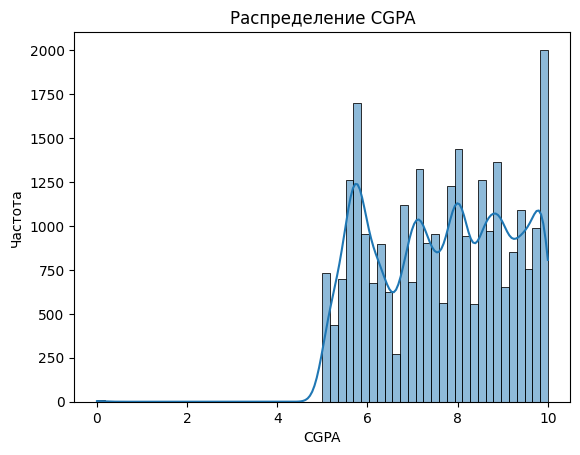

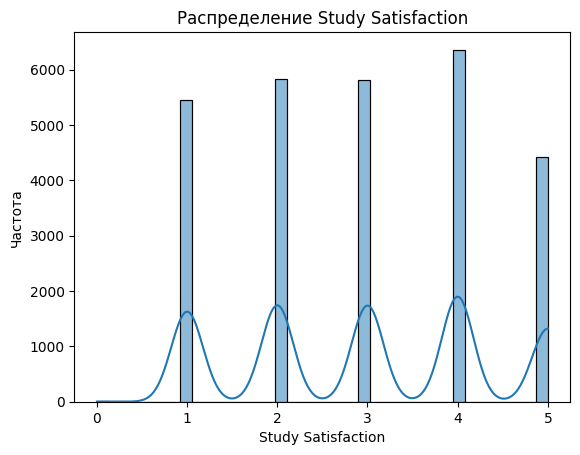

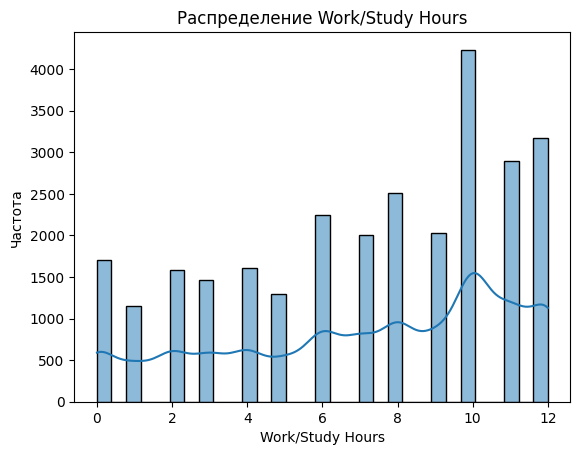

In [ ]:
num_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours']

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

**Age (возраст)**

Нормальность: распределение не является нормальным, так как оно смещено влево и не имеет симметричной формы.
Концентрация: большинство значений находится в диапазоне 19–24 лет.

.

**Academic Pressure (академическое давление)**

Нормальность: не нормальное, наблюдается смещение вправо — большая плотность высоких значений.
Концентрация: основные значения находятся на среднем и выше среднего уровне давления.

.

**CGPA (средний балл)**

Нормальность: не нормальное, выраженное смещение вправо — много высоких оценок, мало низких.
Концентрация: большинство значений сосредоточено в диапазоне 7–8 баллов.

.

**Study Satisfaction (удовлетворённость учёбой)**

Нормальность: не нормальное, распределение неровное и мультимодальное (несколько пиков).
Концентрация: основные значения — средний уровень удовлетворённости, отдельная группа — низкий.

.

**Work/Study Hours (часы учёбы/работы)**

Нормальность: не нормальное, есть длинный правый хвост — редкие высокие значения.
Концентрация: большинство студентов тратят 5–8 часов в день.

**Столбчатая диаграмма для категориальной переменной**

**Задание №3**

-Описать вывод графиков.

-в каких значениях концентрируентся переменная?


-если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

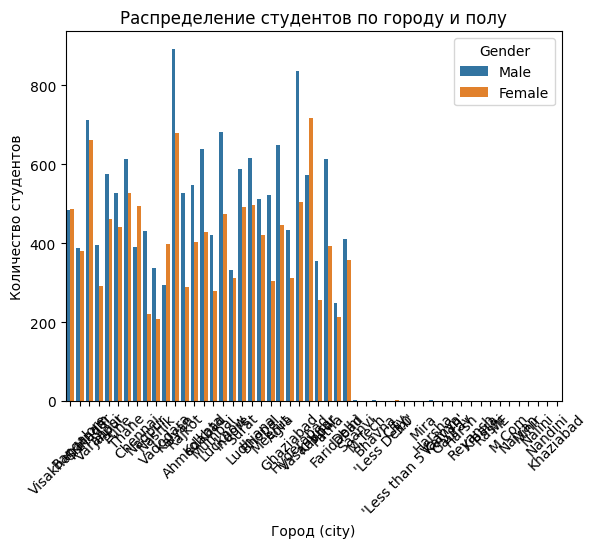

In [ ]:
sns.countplot(x='City', hue='Gender', data=df)
plt.title('Распределение студентов по городу и полу')
plt.xlabel('Город (city)')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.show()

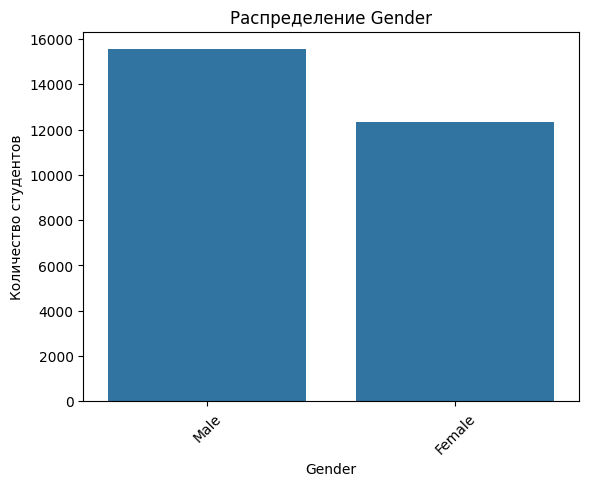

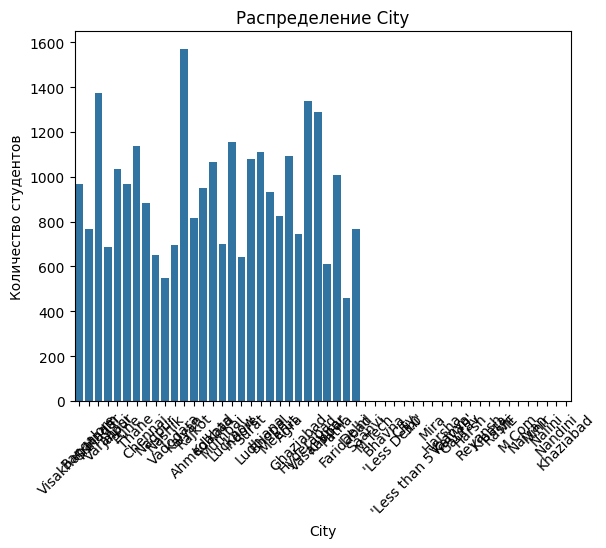

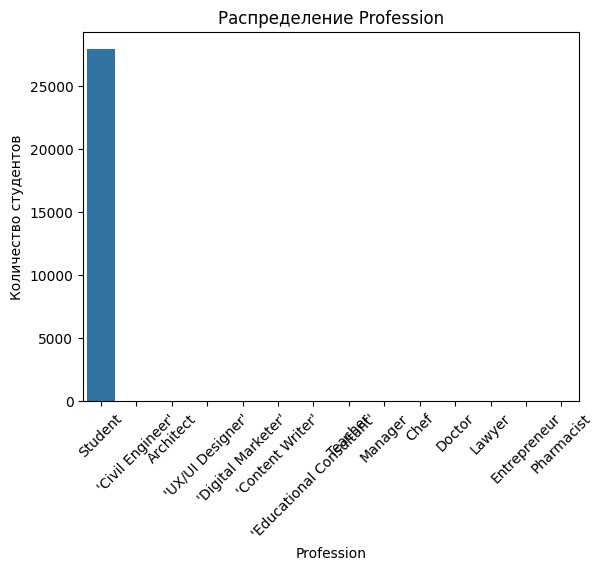

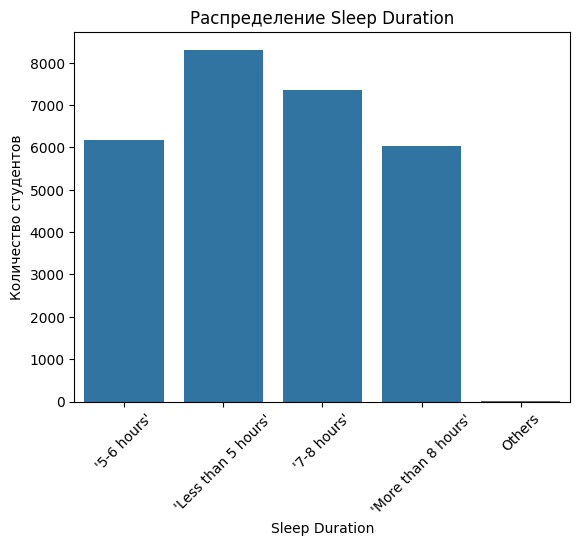

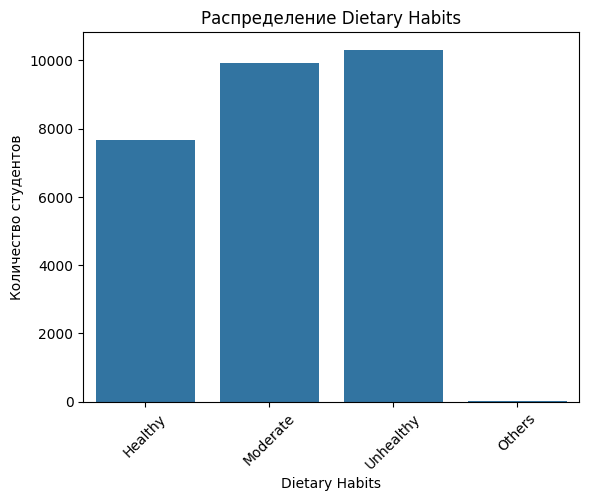

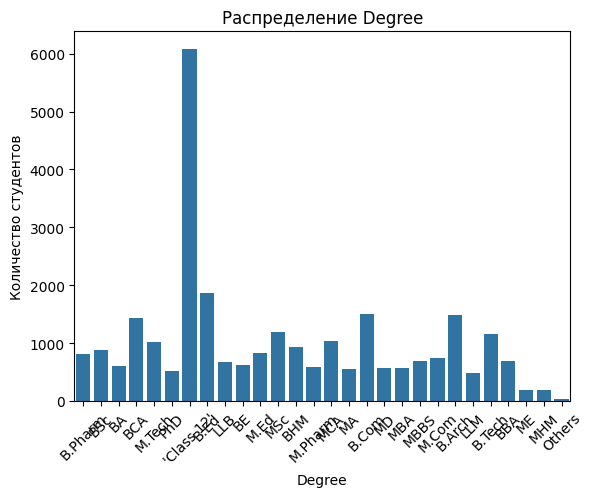

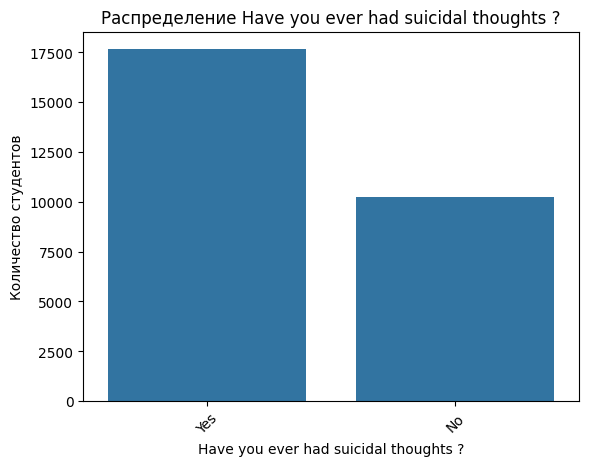

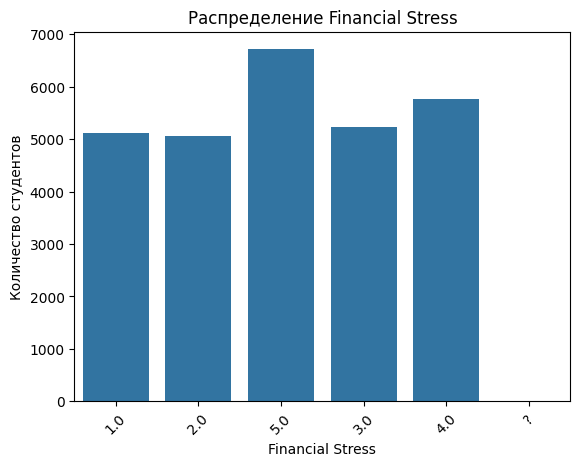

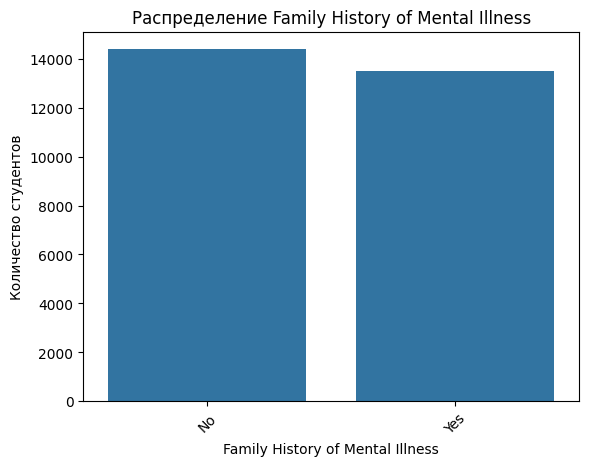

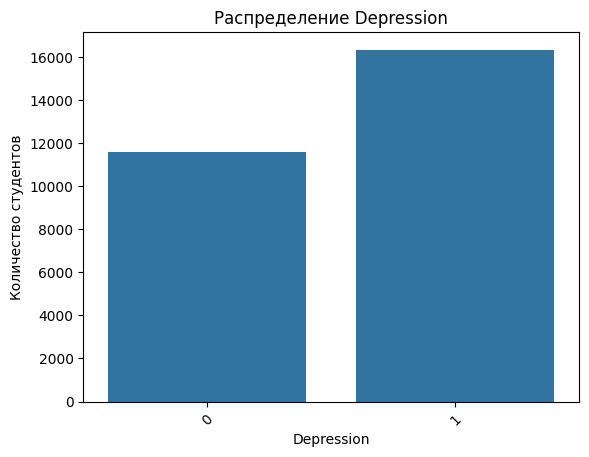

In [ ]:
# выбираем категориальные столбцы
cat_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
            'Degree', 'Have you ever had suicidal thoughts ?',
            'Financial Stress', 'Family History of Mental Illness', 'Depression']

# рисуем все по очереди
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество студентов')
    plt.xticks(rotation=45)
    plt.show()

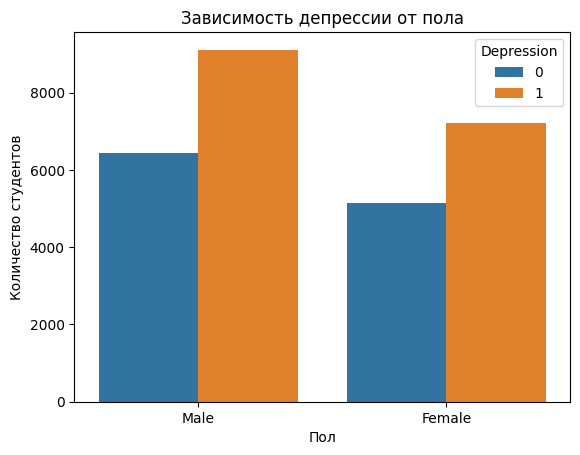

In [ ]:
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Зависимость депрессии от пола')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')
plt.show()

все неравномерные

**Боксплот для числовой переменной:**

**Задание №4**

Описать вывод графиков.

-Есть ли выбросы?


-если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина). Определить различия по медиане

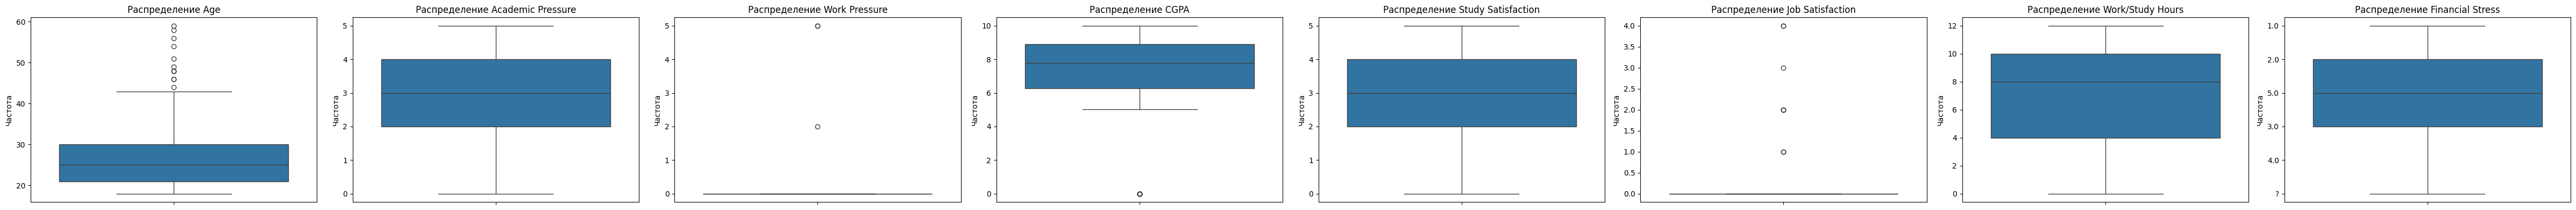

In [ ]:
numeric_cols = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress'
]


fig, axes = plt.subplots(1, len(numeric_cols), figsize=(6 * len(numeric_cols), 4))


for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

Выбросы имеются:

Age


Work Pressure


CGPA


Job Satisfaction

 .

.

.

.

.

**Корреляционная матрица для всех числовых переменных и визуализация с помощью тепловой карты:**

**Задание №5**

Интерпертировать полученный результат:

-Какие переменные не коррелируют?


-Какие переменные имеют сильную положительную корреляцию?


-Какие переменные имеют сильную слабую корреляцию?

p.s. сильная корреляция считаем abs(corr_coef) >= 0.7

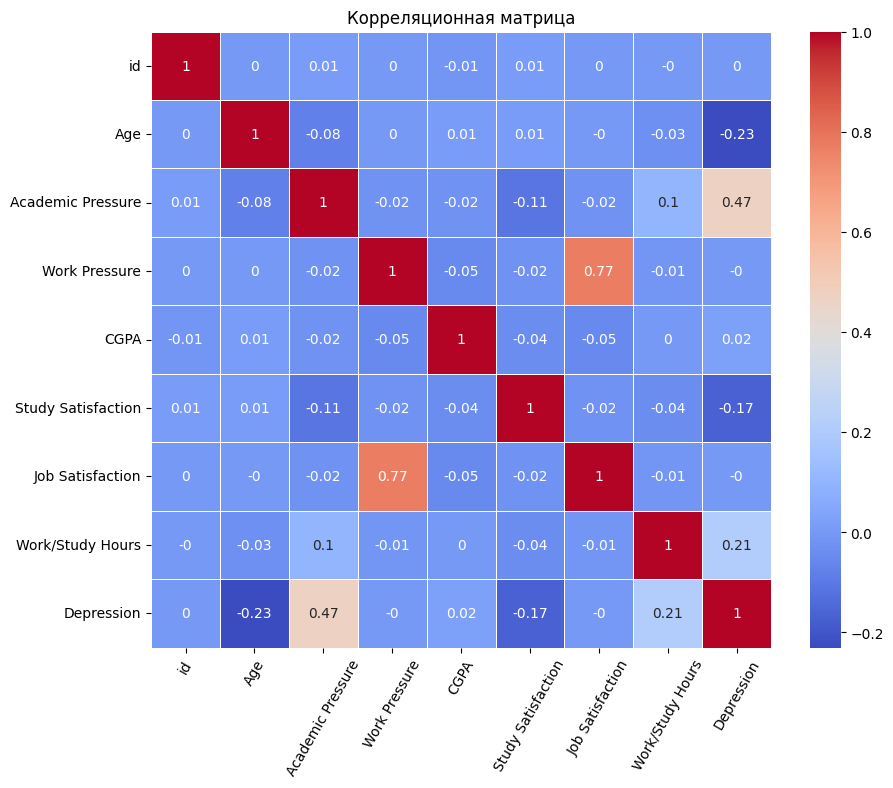

In [ ]:
correlation_matrix = df.select_dtypes(include=[float, int]).corr().round(2)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()

**Не коррелируют:**

id - Age

id - Work Pressure

id - Job Satisfaction

id - Depression

id - Work/Study Hours

Work Pressure - Depression

Job Satisfaction - Depression

Work/Study Hours - CGPA

Job Satisfaction - Age

Work Pressure - Age



**Какие переменные имеют сильную положительную корреляцию?**

Job Satisfaction - Work Pressure




**Какие переменные имеют сильную слабую корреляцию?**

Academic Pressure и Depression